Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np

In [2]:
glass=pd.read_csv('/users/rahulkp/downloads/glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
array=glass.values
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [4]:
X=array[:,0:9]
y=glass.Type

In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [6]:
# Scaling the data as some of the data points values are much higher compared to others
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_data=scale.fit_transform(X)

In [7]:
scaled_data

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [8]:
X=scaled_data
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [9]:
X.shape

(214, 9)

In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [11]:
y.shape

(214,)

In [12]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=15)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
model=KNeighborsClassifier(n_neighbors=5)
result=cross_val_score(model,X,y,cv=kfold)

In [14]:
print('Result:',result)
print('Mean of Result:',result.mean())

Result: [0.66666667 0.86666667 0.8        0.6        1.         0.71428571
 0.57142857 0.28571429 0.57142857 0.64285714 0.07142857 0.
 0.14285714 0.71428571 0.92857143]
Mean of Result: 0.5717460317460318


by Selecting the value of K=5,we got an accuracy of 57%

the best value of k can be found by using GRID SEARCH , there by we could look for a room of improvement in accuracy

# Grid Search for Algorithm Tuning

To avoid the dilemma in choosing the neighbour points,For The best value of K , we consider ODD numbers 

In [18]:
from sklearn.model_selection import GridSearchCV
n_neighbors=np.array([2*i+1 for i in range(1,15)])
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])}

In [19]:
KNN=KNeighborsClassifier()
grid=GridSearchCV(estimator=KNN,param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])})

In [20]:
print(grid.best_score_)
print(grid.best_params_)

0.6498338870431895
{'n_neighbors': 3}


The best value for K is 3

By using K = 2 we can get an accuracy of 64.98%

# Visualizing the CV results

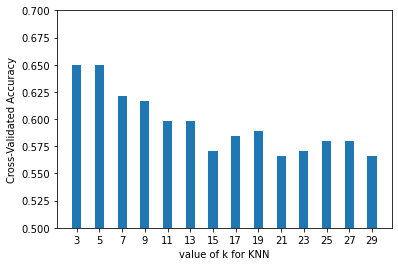

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range=[2*i+1 for i in range(1,15)]
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=5)
    k_scores.append(scores.mean())

plt.bar(k_range,k_scores)
plt.xlabel('value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.5,0.7)
plt.show()

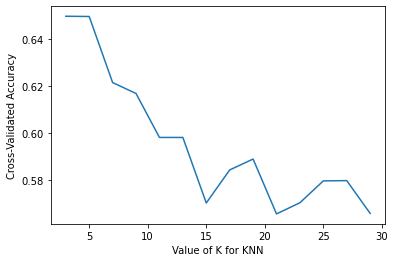

In [24]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()